# Data Analysis/ Preprocessing

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mne, glob
from scipy.io import loadmat

In [2]:
#https://figshare.com/articles/dataset/MAMEM_EEG_SSVEP_Dataset_III_14_channels_11_subjects_5_frequencies_presented_simultaneously_/3413851
#target frequencies: (6.66, 7.50, 8.57, 10.00 and 12.00 Hz)

In [4]:
folder = "./tries/"
eeg_df = pd.read_csv(folder+"U001ai.csv")

matfiles = glob.glob("events.mat")
dat = loadmat(matfiles[0])


In [31]:
eeg_df

,Time,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.0000,6.9739,6.9322,7.1026,6.5821,1.7104,2.5049,6.7734,14.2249,9.3461,12.6649,8.4581,7.2145,10.8199,7.6620,0.0
1,7.8125,7.9141,8.1761,7.8708,9.3562,2.8522,1.5386,0.0097,7.7515,9.0807,11.3698,9.8010,8.5768,13.4646,8.5372,0.0
2,15.6250,7.3519,7.6082,6.8952,10.5481,3.3565,0.1431,-7.9001,-1.5285,6.7772,7.1663,8.7549,8.2436,12.8546,7.3061,0.0
3,23.4375,5.1758,5.0452,4.1830,9.5852,2.7879,-1.5613,-15.0065,-11.1183,2.7676,0.7851,5.0990,5.8934,8.6539,3.9140,0.0
4,31.2500,1.6995,0.8580,0.2629,6.3879,1.0203,-3.4012,-19.4232,-18.2671,-2.1636,-6.3391,-0.5606,1.7797,1.6455,-1.0385,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17787,138960.9375,-6.0399,-4.8323,-5.0927,-4.9968,-4.8824,-5.0700,-5.0636,-5.1674,-4.8204,-5.4288,-10.1374,-5.5791,-5.2607,-5.0845,0.0
17788,138968.7500,-5.4750,-4.3214,-4.5884,-4.4572,-4.4641,-4.6841,-4.9248,-4.4180,-4.2093,-4.6997,-9.0893,-4.9611,-4.7169,-4.5362,0.0
17789,138976.5625,-5.7512,-4.5558,-4.8286,-4.7329,-4.8624,-5.0746,-5.4562,-4.5852,-4.4190,-4.7919,-9.5092,-4.9946,-4.8802,-4.6183,0.0
17790,138984.3750,-6.0096,-4.8120,-5.0684,-5.0460,-5.2511,-5.4070,-5.7562,-4.9003,-4.7309,-5.0272,-9.9559,-5.0331,-5.0706,-4.7129,0.0


In [7]:
#Variable with the .mat info. This is to get the events info:
dat

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Tue May 17 00:03:01 2022',
 '__version__': '1.0',
 '__globals__': [],
 'events': array([[    1, 32769,   646,     1],
        [    2, 33028,   902,     2],
        [    3, 32779,  1030,     3],
        [    4, 32780,  1670,     4],
        [    5, 33026,  2310,     5],
        [    6, 32779,  2438,     6],
        [    7, 32780,  3078,     7],
        [    8, 33027,  3718,     8],
        [    9, 32779,  3846,     9],
        [   10, 32780,  4486,    10],
        [   11, 33029,  5126,    11],
        [   12, 32779,  5254,    12],
        [   13, 32780,  5894,    13],
        [   14, 33025,  6534,    14],
        [   15, 32779,  6662,    15],
        [   16, 32780,  7302,    16],
        [   17, 33026,  7942,    17],
        [   18, 32779,  8070,    18],
        [   19, 32780,  8710,    19],
        [   20, 33029,  9350,    20],
        [   21, 32779,  9478,    21],
        [   22, 32780, 10118,    22],
        [   23,

In [8]:
#interval = eeg[1,0]  #milliseconds

epoch = []
all_events = dat['events'][:]
unique_events = np.unique(dat['events'][:,1])

for event in (unique_events):
    for i in all_events:
        if(i[1] == event):
            epoch.append([event,i[2]-128, i[2]+(128*5)])   # i[x] - 128 = 1 second before event;    i[x]+(128*5) = 5 seconds after event
       
print(epoch)

[[32769, 518, 1286], [32779, 902, 1670], [32779, 2310, 3078], [32779, 3718, 4486], [32779, 5126, 5894], [32779, 6534, 7302], [32779, 7942, 8710], [32779, 9350, 10118], [32779, 10758, 11526], [32779, 12166, 12934], [32779, 13574, 14342], [32779, 14982, 15750], [32779, 16390, 17158], [32780, 1542, 2310], [32780, 2950, 3718], [32780, 4358, 5126], [32780, 5766, 6534], [32780, 7174, 7942], [32780, 8582, 9350], [32780, 9990, 10758], [32780, 11398, 12166], [32780, 12806, 13574], [32780, 14214, 14982], [32780, 15622, 16390], [32780, 17030, 17798], [33025, 6406, 7174], [33025, 14854, 15622], [33026, 2182, 2950], [33026, 7814, 8582], [33026, 12038, 12806], [33027, 3590, 4358], [33027, 13446, 14214], [33028, 774, 1542], [33028, 10630, 11398], [33029, 4998, 5766], [33029, 9222, 9990], [33029, 16262, 17030]]


In [19]:
#Transform the eeg dataframe into array to perform np calculations if needed
eeg = np.array(eeg_df)
eeg.shape

(17792, 16)

(0.0, 15.0)

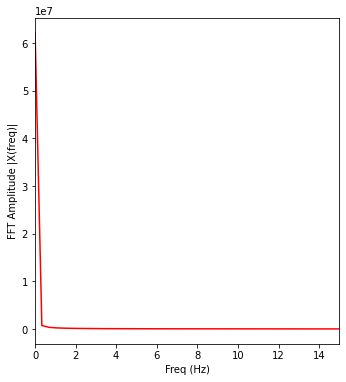

In [123]:
data_to_fft = []
specific_event = epoch[19][0]
starting_index = epoch[19][1]
ending_index = epoch[19][2]

data_to_fft = [eeg[starting_index:ending_index,0]]
#data_to_fft[-1][0] -> to get the event


#------------ FFT ------------:

X1 = fft(data_to_fft[0])
half = int(len(X1)/2) # to avoid mirrored image

X = X1[:half]
N = len(X)
n = np.arange(N)
sampling_rate = 128
T = N/sampling_rate  #128 sampling rate
freq = n/T

final_fft_values = np.abs(X)

plt.figure(figsize = (12, 6))
plt.subplot(121)
plt.plot(freq[:half],final_fft_values , 'r')
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')
plt.xlim(0, 15)

### For all the channel info (without epoch)

In [92]:
# Length in seconds of the whole trial of a single .mat file
seconds = (eeg[-1,0])/1000
seconds

138.9921875

In [21]:
# Variable for a single channel in the eeg dataframe/array to then plot the signal or to perform FFT to that specific channel
x = eeg.T[1][:]
x

array([ 6.9739,  7.9141,  7.3519, ..., -5.7512, -6.0096, -5.3808])

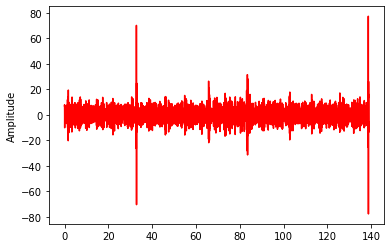

In [22]:
#Plotting the signal of the entire data of 1 channel in 1 .mat file:

# sampling rate
sr = 128
# sampling interval
ts = 1.0/sr
t = np.arange(0,seconds+(1/seconds),ts) #use "seconds variable for all seconds"   ; +(1/seconds) = to make it the same dimension as "x". Don't know exactly why

#plt.figure(figsize = (8, 6))
plt.plot(t, x, 'r')
plt.ylabel('Amplitude')
plt.show()

## FFT in Numpy

c:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


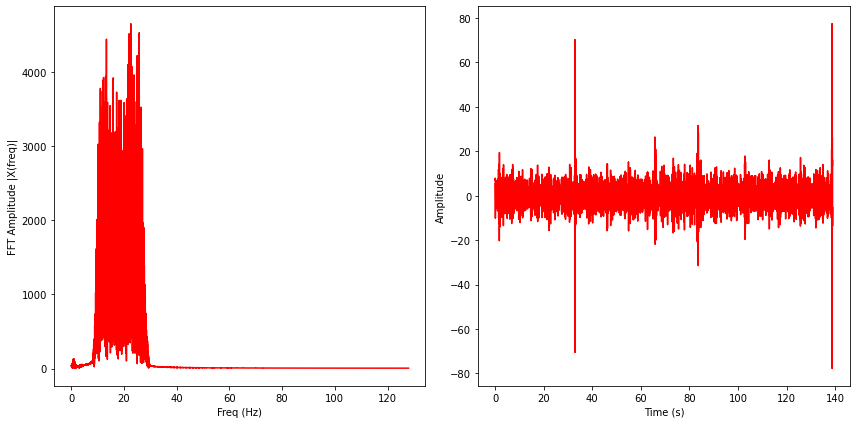

In [25]:
from numpy.fft import fft, ifft

X1 = fft(x)
half = int(len(X1)/2) # to avoid mirrored image

X = X1[:half]
N = len(X)
n = np.arange(N)
T = N/sr
freq = n/T 

#------------ FFT ------------:

plt.figure(figsize = (12, 6))
plt.subplot(121)

#plt.stem is for vertical bar graphs:
#plt.stem(freq[:half], np.abs(X), 'b', \
#         markerfmt=" ", basefmt="-b")

plt.plot(freq[:half], np.abs(X), 'r')
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')
#plt.xlim(0, 20)

#------------ Original Signal ------------:

plt.subplot(122)
plt.plot(t, ifft(X1), 'r')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()

In [24]:
# Obtain the index (in the x axis) and the value of the highest Frequency in this calculation:
peak_idx = np.argmax(np.abs(X), axis=0)
peak_freq = freq[peak_idx]
peak_idx , peak_freq

(1573, 22.633093525179856)